# EDA 

### 데이터 불러오기

In [359]:
import pandas as pd

import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import cross_val_score, cross_validate

import seaborn as sns
import numpy as np


# Read in white wine data 
#white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

# Read in red wine data 
# red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red = pd.read_csv("winequality-red.csv", sep=';')

# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

### 값 확인

In [360]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [361]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<AxesSubplot:>

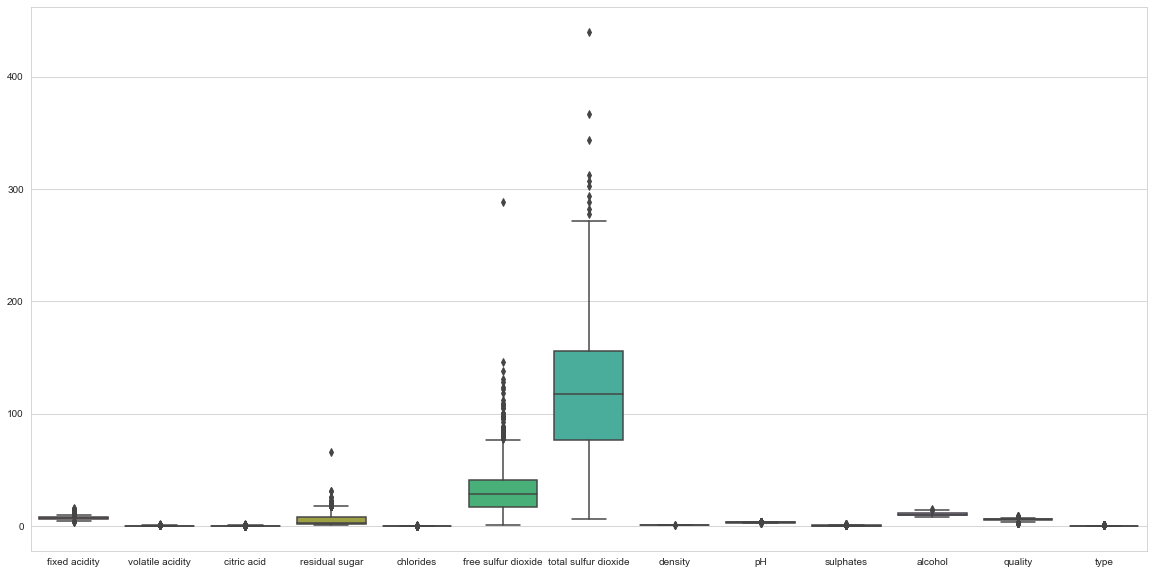

In [362]:
%matplotlib inline
%config Completer.use_jedi = False

plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams["figure.figsize"] = (20,10)

sns.set_style("whitegrid")
sns.boxplot(data = wines) 

### 전처리

<AxesSubplot:>

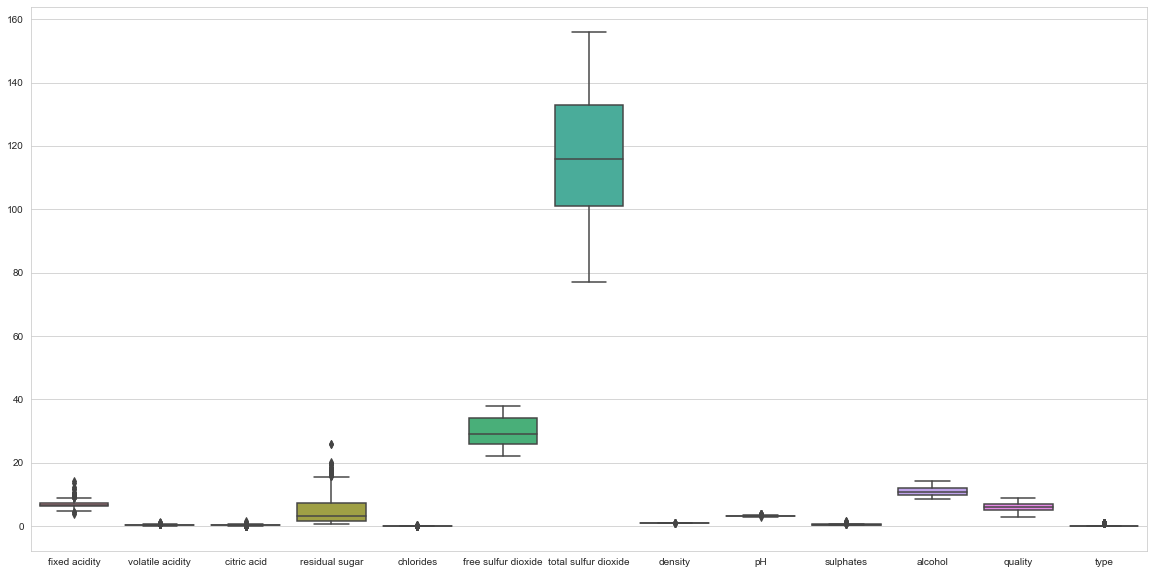

In [363]:
#outlier 제거

column_names_for_remove_outliers = ['total sulfur dioxide','free sulfur dioxide']

for column_name in column_names_for_remove_outliers:
    y = wines[column_name]
    removed_outliers = y.between(y.quantile(.25), y.quantile(.75))
    index_names = wines[~removed_outliers].index
    wines.drop(index_names, inplace=True)

sns.boxplot(data=wines)

In [364]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [365]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 16 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1670 non-null   float64
 1   volatile acidity      1670 non-null   float64
 2   citric acid           1670 non-null   float64
 3   residual sugar        1670 non-null   float64
 4   chlorides             1670 non-null   float64
 5   free sulfur dioxide   1670 non-null   float64
 6   total sulfur dioxide  1670 non-null   float64
 7   density               1670 non-null   float64
 8   pH                    1670 non-null   float64
 9   sulphates             1670 non-null   float64
 10  alcohol               1670 non-null   float64
 11  quality               1670 non-null   int64  
 12  type                  1670 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 182.7 KB


In [366]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.25,0.73,9.2,5,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4,5,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,1


### 결측치 확인

In [367]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(wines)

결측치가 존재하지 않습니다


### 정답 레이블 분포 확인

In [368]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.25,0.73,9.2,5,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4,5,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,1


In [369]:
fig=px.histogram( data_frame = wines,
            x = wines['quality'],
            color = wines['quality'])
fig.show()

### 상관관계 분석

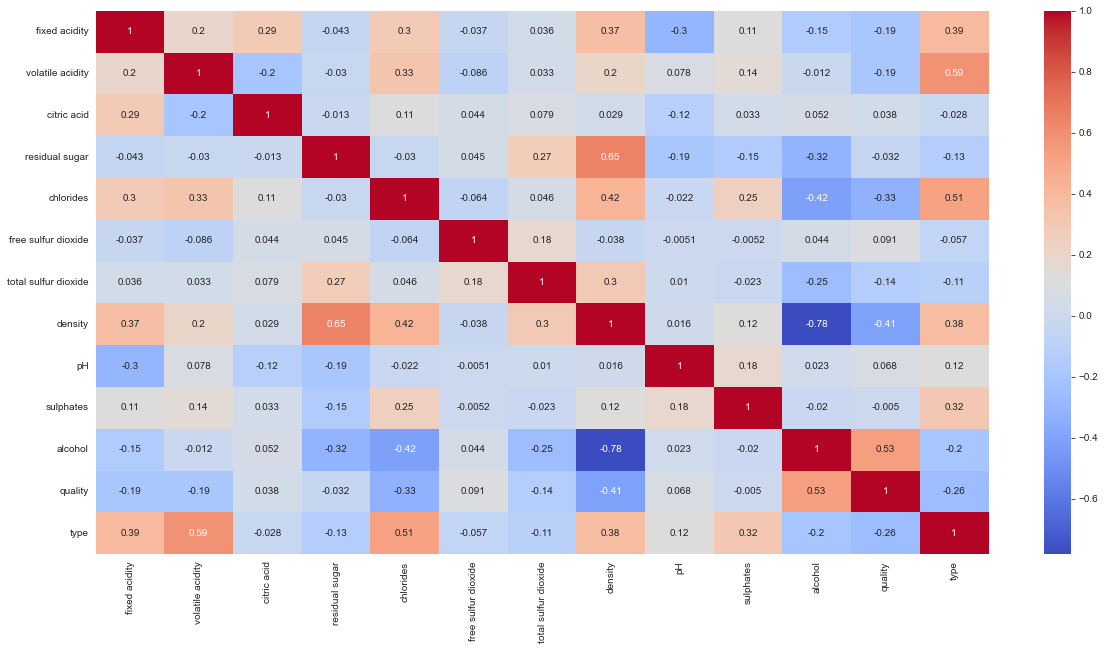

In [370]:
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
plt.show()

In [371]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.25,0.73,9.2,5,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4,5,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,1


### Train 데이터와 Test 데이터로 나누고, 데이터 확인

In [372]:
wines_copy = wines.copy()

# 왜도 조정
def check_skewness(x):
    
    skew_limit = 0.75
    skew_value = wines_copy[wines_copy.columns].skew()
    skew_cols=skew_value[abs(skew_value)>skew_limit]
    #print(skew_cols)
    cols=skew_cols.index
    return cols
    
# skewed_col=check_skewness(wines_copy)
# print(skewed_col)

#pt = PowerTransformer(standardize=False)
#wines_copy[skewed_col] = pt.fit_transform(wines_copy[skewed_col])


df1 = wines_copy.pop('type') # remove column b and store it in df1
df2 = wines_copy.pop('quality') # remove column x and store it in df2
wines_copy['type']= df1 # add b series as a 'new' column.
wines_copy['quality']= df2 # add b series as a 'new' column.

# Specify the data 
X = wines_copy.iloc[:,0:-1]  # 12 dimensions

# Specify the target labels and flatten the array 
y = np.ravel(wines_copy.quality)

# Split the data up in train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [373]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     78.41
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          3.27e-152
Time:                        11:05:35   Log-Likelihood:                -1716.9
No. Observations:                1670   AIC:                             3460.
Df Residuals:                    1657   BIC:                             3530.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  173.9126 

In [374]:
y_train

array([7, 5, 7, ..., 5, 6, 6])

### DecisionTreeClassifier를 이용한 분류

In [375]:
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 62.5%


### 나이브 베이즈를 통한 예측

In [376]:
estimator = GaussianNB()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 46.2%
Test 정확도 : 44.2%


### 나이브 베이즈 모델을 file로 저장하고 불러온다. 

In [377]:
import pickle
import joblib

# 모델을 파일에 저장
naive_model_reuslt_filename = 'naive_model.sav'
pickle.dump(estimator, open(naive_model_reuslt_filename, 'wb'))

# 모델을 불러온다. 
loaded_model = pickle.load(open(naive_model_reuslt_filename, 'rb'))

# accuracy를 구한다.
results = loaded_model.predict(x_train)
score_result = loaded_model.score(x_test, y_test)

print("[PREDICT RESULT] {}".format(results))
print("[ACCURACY] {}%".format(round(score_result*100,1)))


[PREDICT RESULT] [7 7 7 ... 6 6 7]
[ACCURACY] 44.2%


### 앙상블 기법을 이용한 예측

In [378]:
estimator = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                         ('kn', KNeighborsClassifier()),
                                         ('dt', DecisionTreeClassifier())], voting='hard', weights=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 78.4%
Test 정확도 : 60.1%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 랜덤 포레스트를 이용한 예측

In [379]:
estimator = RandomForestClassifier()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 70.3%


### 오답 통계 확인

In [380]:
wrong_answer_arr = y_test[y_predict != y_test]
df_describe = pd.DataFrame(wrong_answer_arr)

df_describe.value_counts()
df_describe.columns = ["wrong_answers"]

In [381]:
df_describe.value_counts()

wrong_answers
7                51
6                41
5                39
8                24
4                 8
9                 1
dtype: int64

In [382]:
fig=px.histogram( data_frame = df_describe,
            x = df_describe['wrong_answers'],
            color = df_describe['wrong_answers'])
fig.show()

### 특성 중요도 파악

<AxesSubplot:>

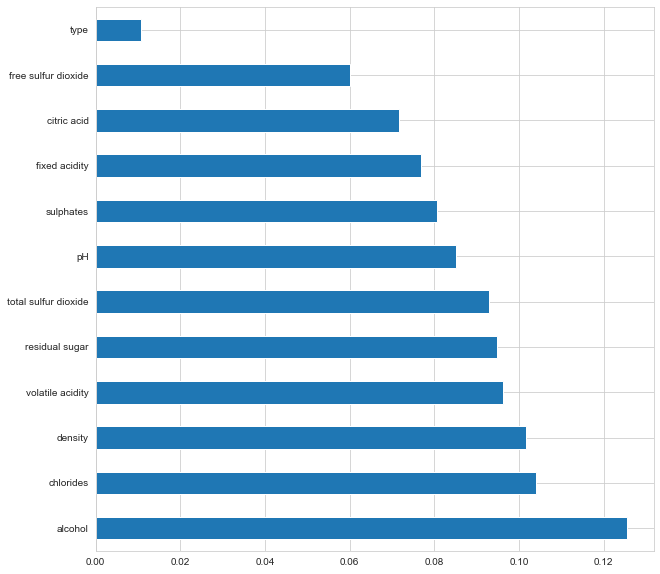

In [383]:
feat_importances = pd.Series(estimator.feature_importances_, index=x_train.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# 중간 결론

quality의 분포가 5,6,7이 대부분이어서, accuracy가 70% 정도로 정확히 예측하기 어려움.  
따라서 6.5를 기준으로, 정상 혹은 불량품임을 판단하도록 분석 내용 변경 

In [384]:
def qualityToBinary(quality):
    # 6.5 이상이면 정상
    if quality >= 6.5:
        return 1
    # 6.5 미만이면 불량
    else :
        return 0

wine_copied = wines.copy()
#중복 항목 제거
wine_copied = wine_copied.drop_duplicates(keep='first')

wine_copied["quality"] = wine_copied.quality.apply(qualityToBinary)

y = wine_copied.pop("quality")

In [385]:
wine_copied

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.99700,3.25,0.73,9.2,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.7,0.210,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,0
6491,6.5,0.230,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,0
6492,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6494,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0


In [386]:
wine_copied.iloc[:,0:len(wine_copied.columns)-1]  # 12 dimensions

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.99700,3.25,0.73,9.2
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1
...,...,...,...,...,...,...,...,...,...,...,...
6490,5.7,0.210,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6
6491,6.5,0.230,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7
6492,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6494,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4


In [391]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()
wine_copied, y = smote.fit_resample(wine_copied,y)

In [392]:
wine_copied.shape

(1998, 12)

In [393]:
y.shape

(1998,)

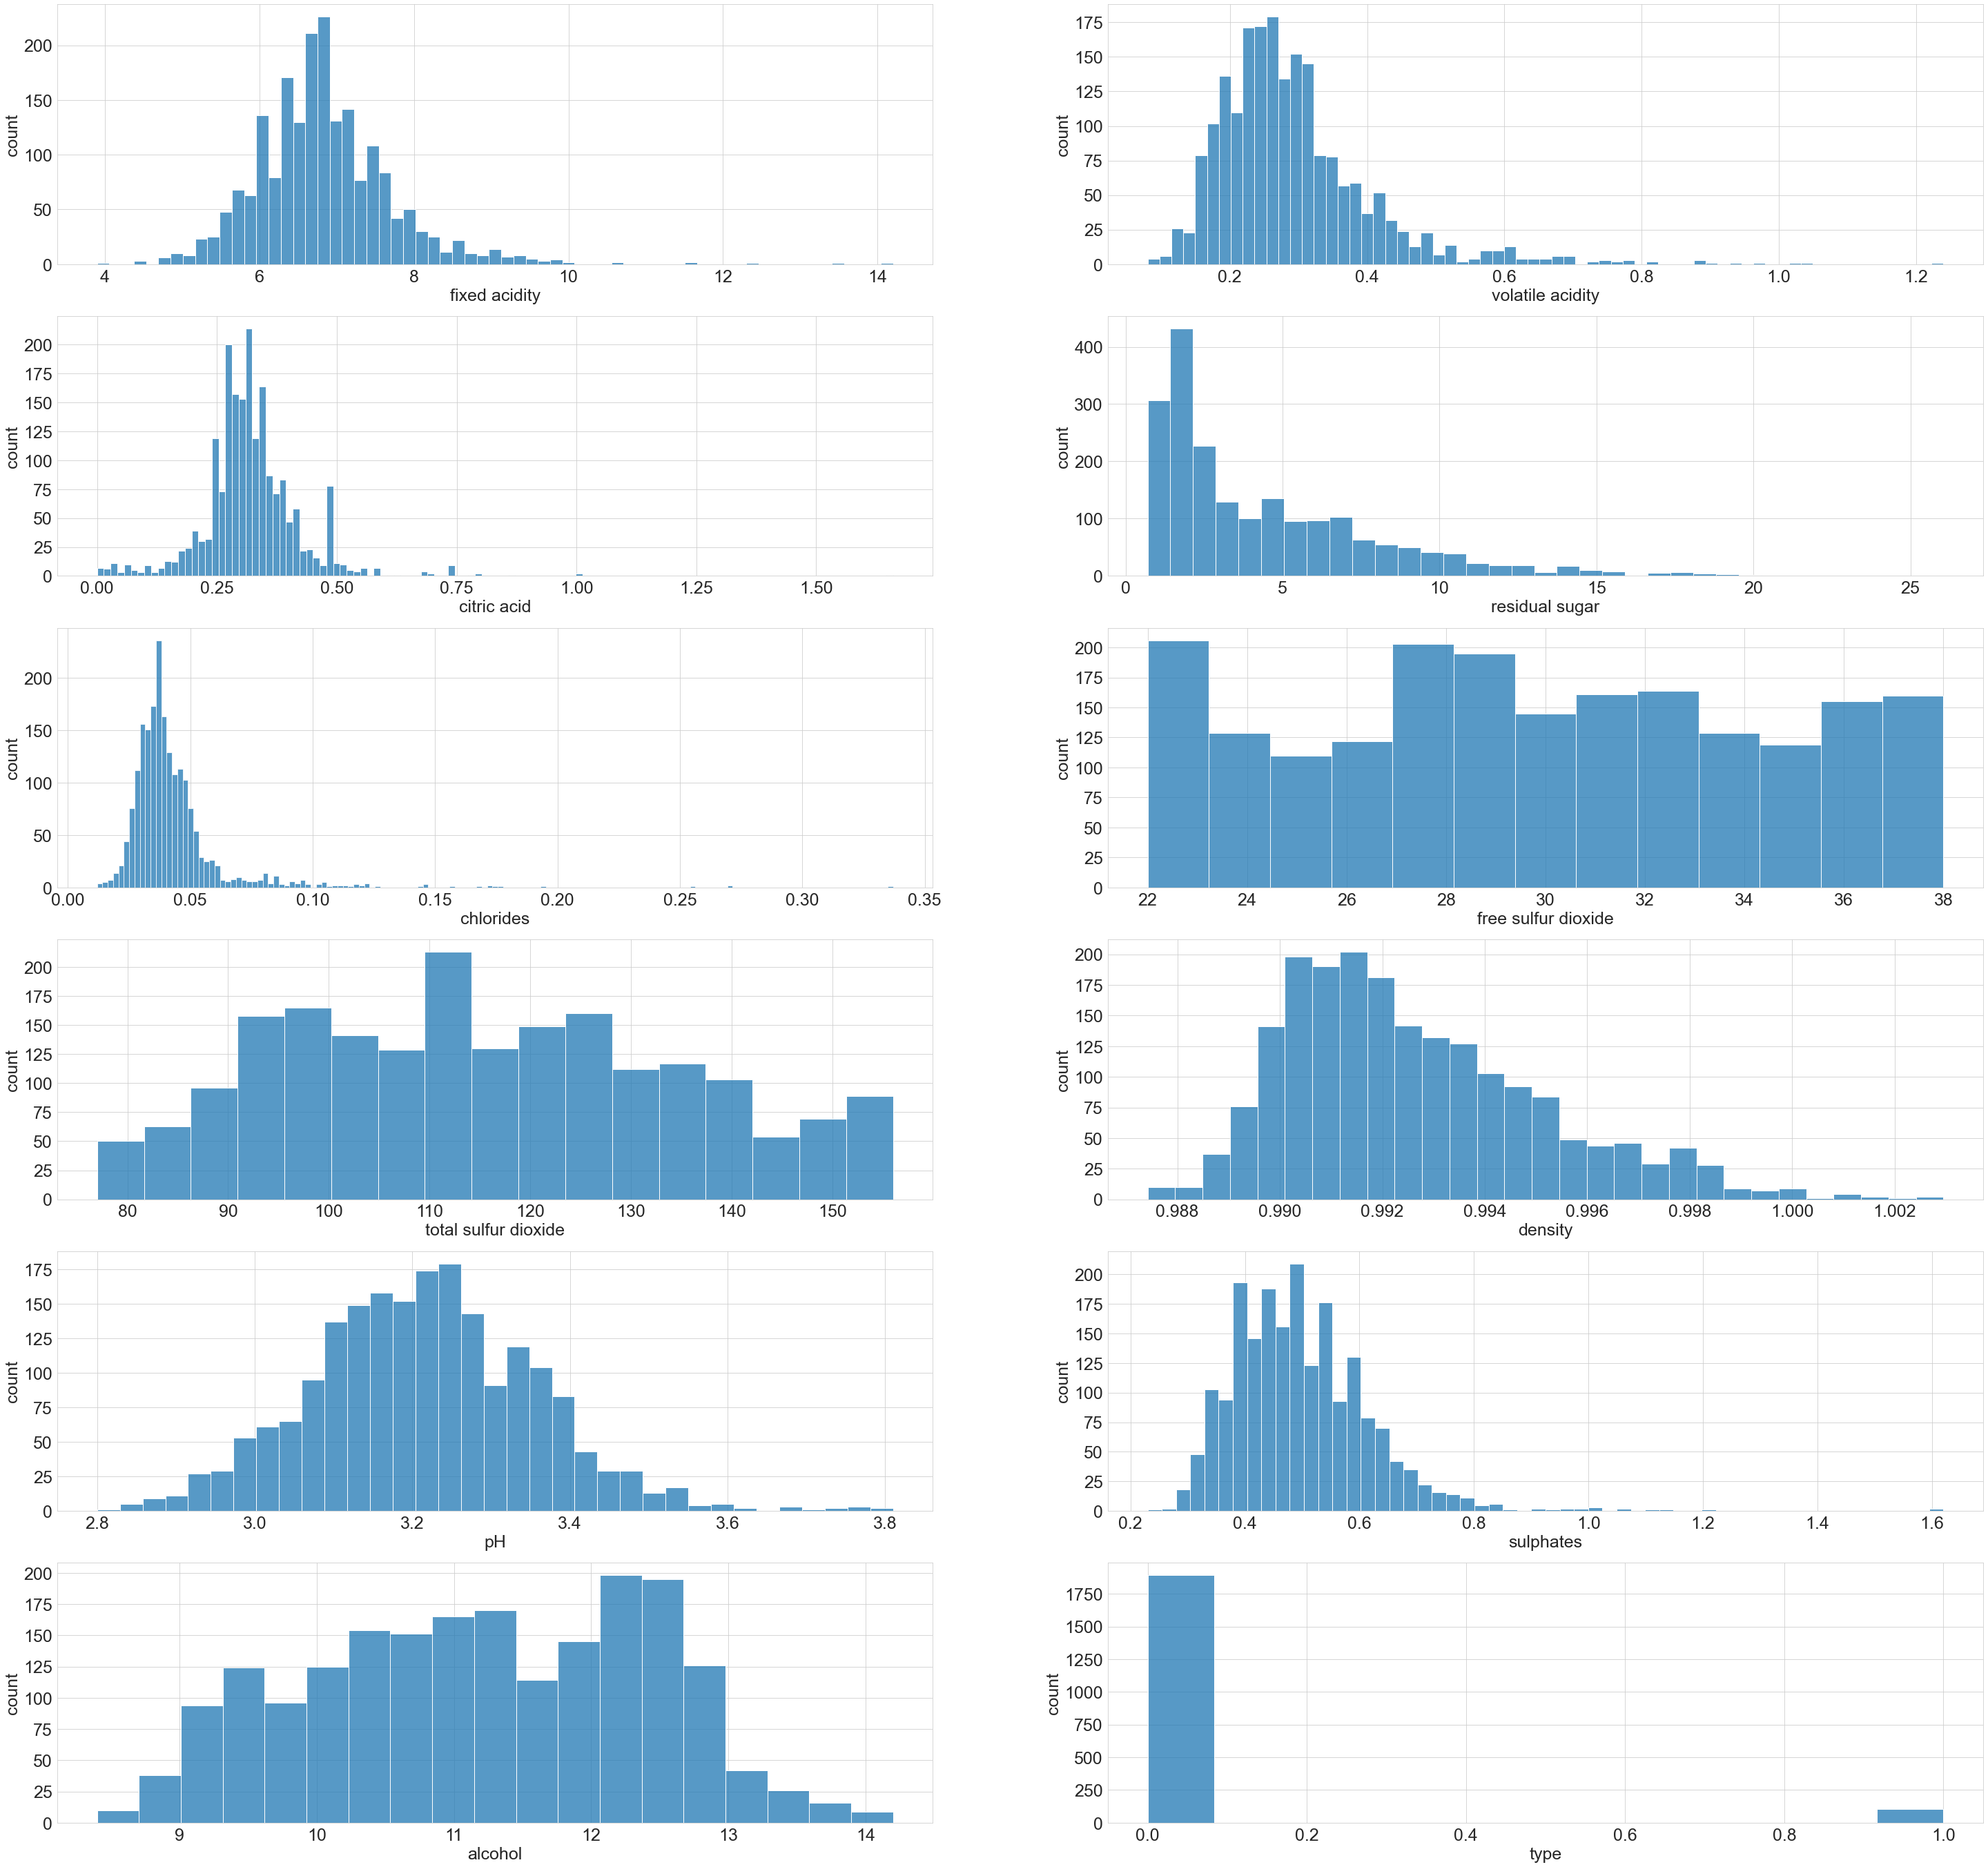

In [394]:
i = 1
plt.figure(figsize=(50,90))

for col in wine_copied.columns:
    plt.subplot(11,2,i)
    sns.histplot(wine_copied[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i = i + 1
plt.show()

### 왜도 조정

In [323]:
def check_skewness(x):
    
    skew_limit = 0.75
    skew_value = wine_copied[wine_copied.columns].skew()
    skew_cols=skew_value[abs(skew_value)>skew_limit]
    #print(skew_cols)
    cols=skew_cols.index
    return cols
    
skewed_col=check_skewness(wine_copied)
print(skewed_col)

pt = PowerTransformer(standardize=False)
wine_copied[skewed_col] = pt.fit_transform(wine_copied[skewed_col])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'sulphates', 'type'],
      dtype='object')


In [324]:
wine_copied[skewed_col].skew()

fixed acidity      -0.049485
volatile acidity    0.028440
citric acid        -0.092125
residual sugar      0.112905
chlorides           0.057194
density             0.000000
sulphates          -0.004875
type                3.991115
dtype: float64

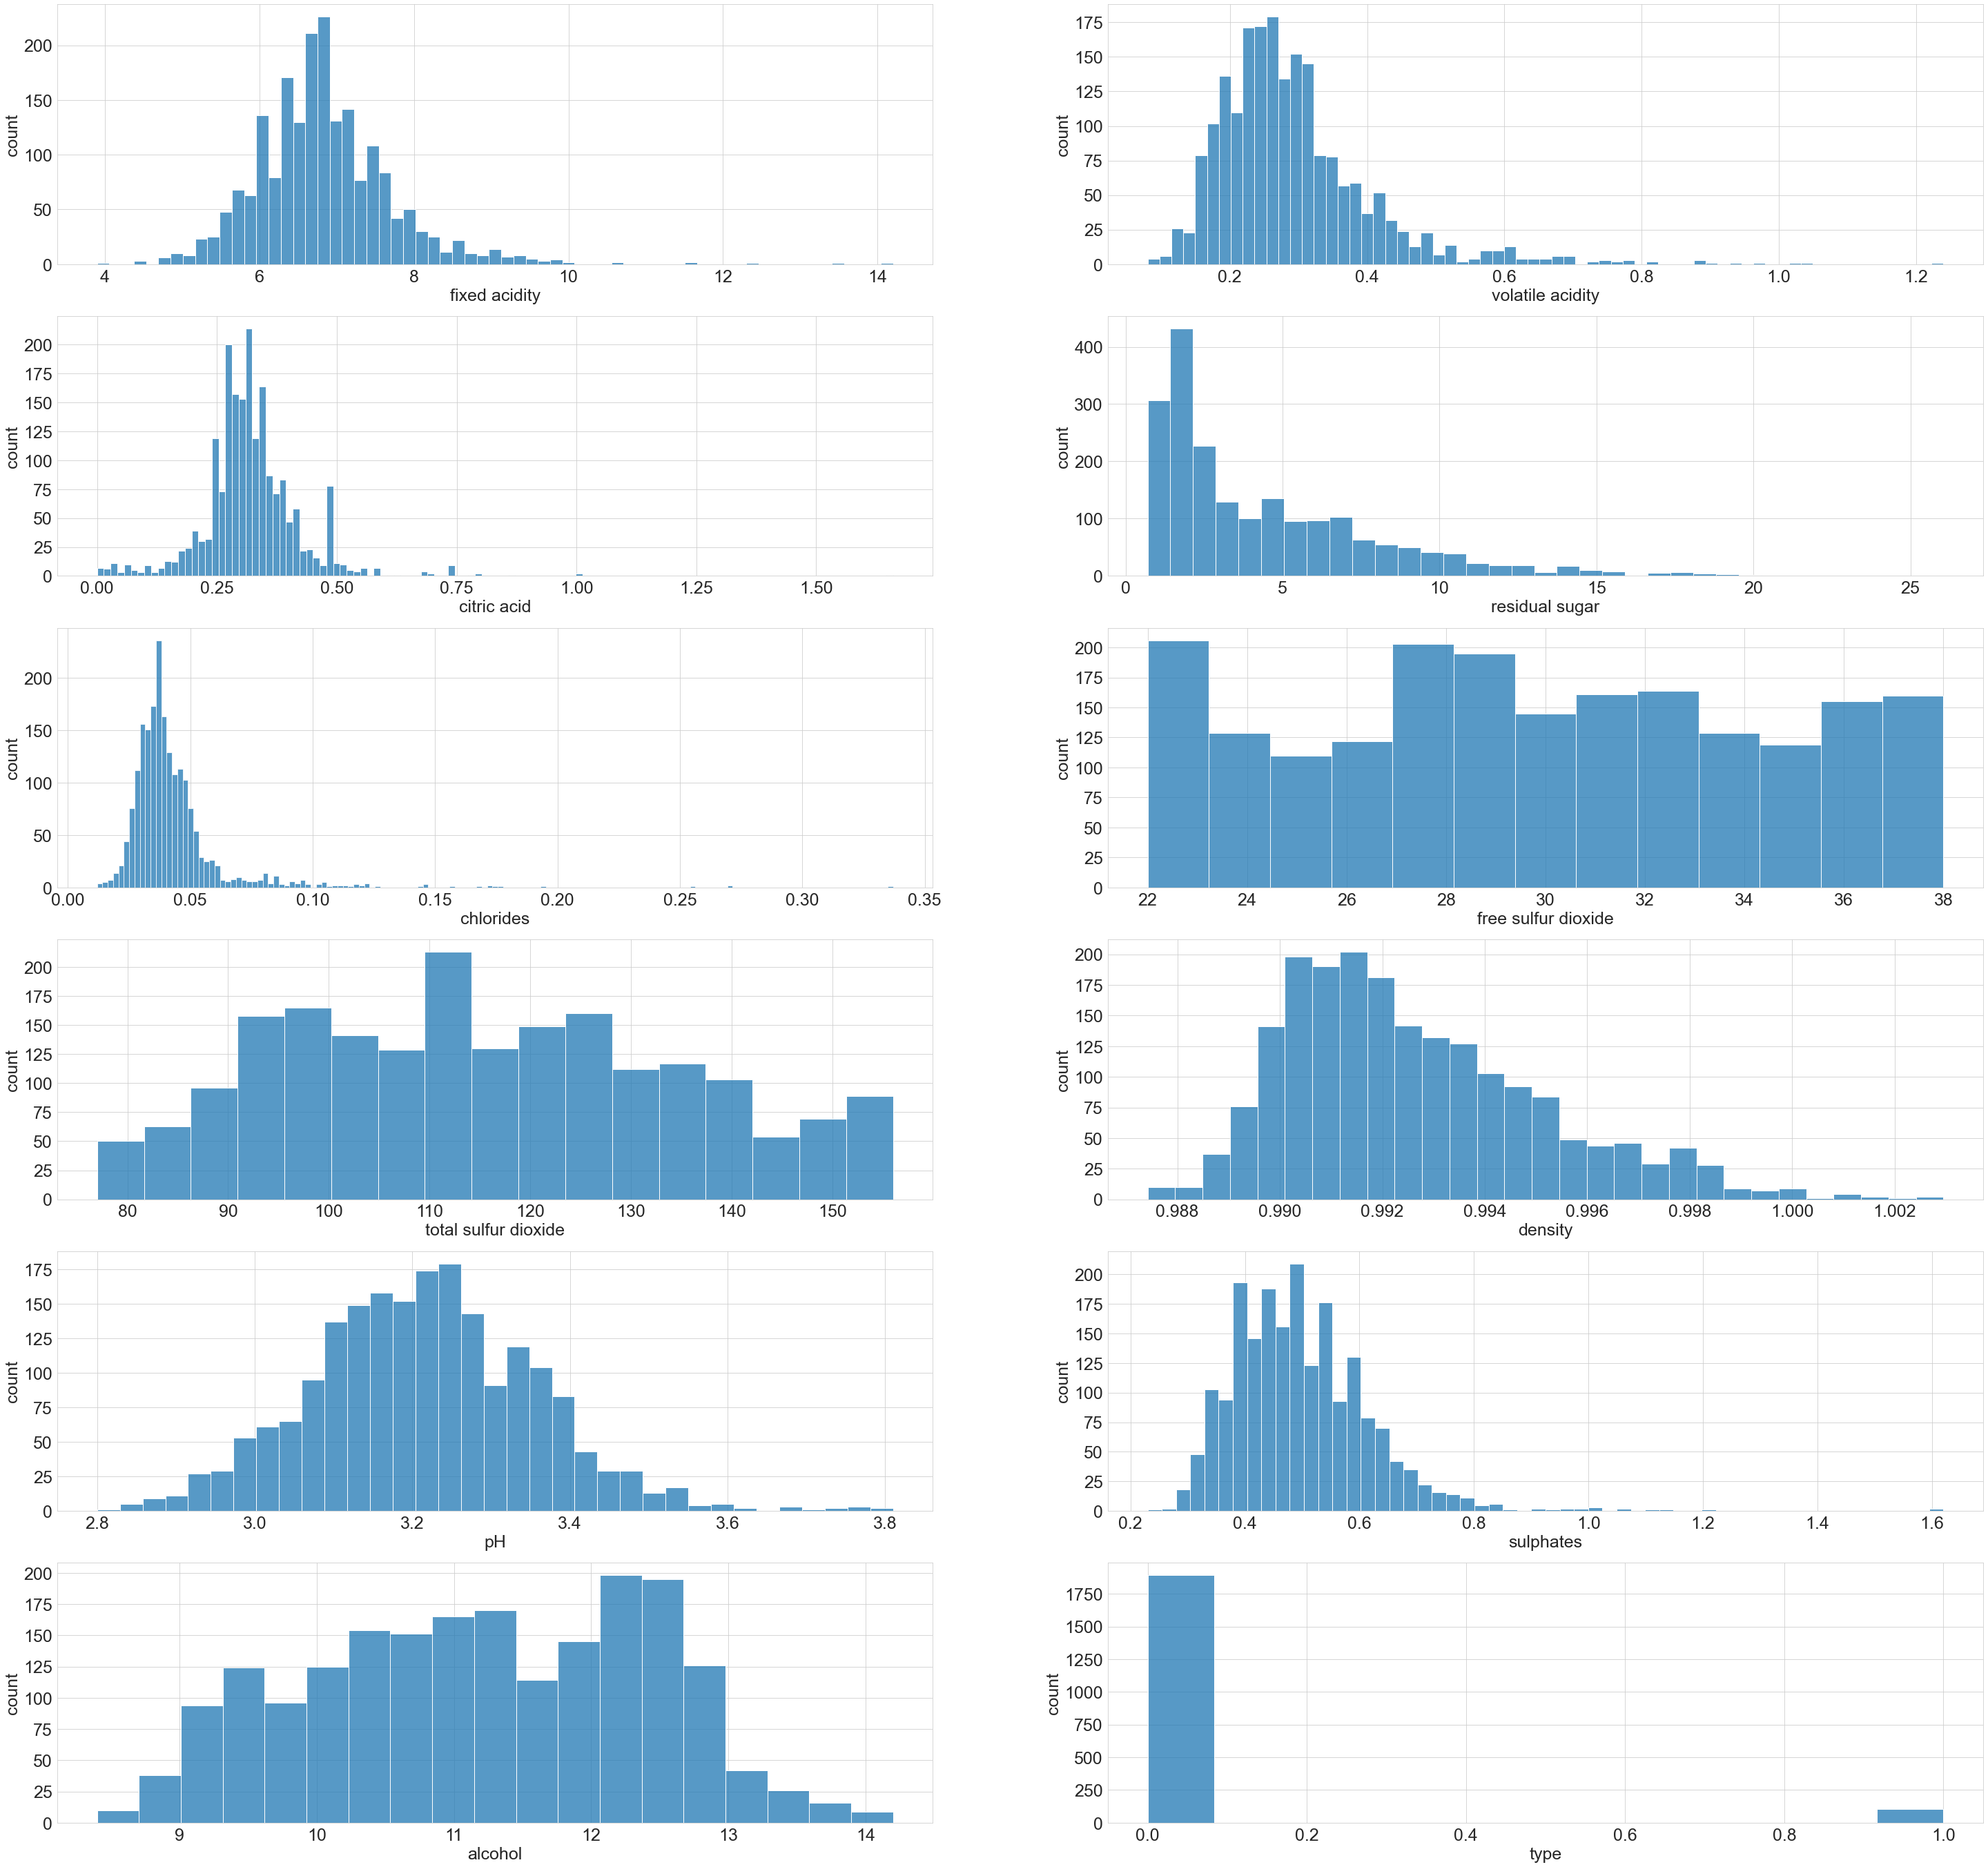

In [395]:
i = 1
plt.figure(figsize=(50,90))

for col in wine_copied.columns:
    plt.subplot(11,2,i)
    sns.histplot(wine_copied[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i = i + 1
plt.show()

In [473]:
x_train, x_test, y_train, y_test = train_test_split(wine_copied, y, test_size=0.33, random_state=42)

In [474]:
len(y_train)

1338

In [475]:
y_train

1667    1
380     1
1102    0
1686    1
84      1
       ..
1130    1
1294    1
860     0
1459    1
1126    0
Name: quality, Length: 1338, dtype: int64

In [476]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     55.45
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          3.89e-108
Time:                        11:18:16   Log-Likelihood:                -698.87
No. Observations:                1338   AIC:                             1424.
Df Residuals:                    1325   BIC:                             1491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  122.1707 

In [477]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1667 to 1126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1338 non-null   float64
 1   volatile acidity      1338 non-null   float64
 2   citric acid           1338 non-null   float64
 3   residual sugar        1338 non-null   float64
 4   chlorides             1338 non-null   float64
 5   free sulfur dioxide   1338 non-null   float64
 6   total sulfur dioxide  1338 non-null   float64
 7   density               1338 non-null   float64
 8   pH                    1338 non-null   float64
 9   sulphates             1338 non-null   float64
 10  alcohol               1338 non-null   float64
 11  type                  1338 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 135.9 KB


### 스케일 조정

In [529]:
sc = StandardScaler()
x_train_normalized = sc.fit_transform(x_train)
x_train_normalized = pd.DataFrame(x_train_normalized)
x_train_normalized.columns = x_train.columns

x_test_normalized = sc.transform(x_test)
x_test_normalized = pd.DataFrame(x_test_normalized)
x_test_normalized.columns = x_test.columns

# 스케일 데이터 저장
from joblib import dump, load
dump(sc, 'std_scaler.bin', compress=True)

# 스케일 데이터 로드
sc = load('std_scaler.bin')

### Random Forest

In [530]:
estimator = RandomForestClassifier()

estimator.fit(x_train_normalized, y_train)

y_predict = estimator.predict(x_train_normalized) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test_normalized) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 83.9%


In [531]:
import pickle
import joblib

# 모델을 파일에 저장
naive_model_reuslt_filename = 'random_forest_model.sav'
pickle.dump(estimator, open(naive_model_reuslt_filename, 'wb'))

# 모델을 불러온다. 
loaded_model = pickle.load(open(naive_model_reuslt_filename, 'rb'))

# accuracy를 구한다.
results = loaded_model.predict(x_train_normalized)
score_result = loaded_model.score(x_test, y_test)

print("[PREDICT RESULT] {}".format(results))
print("[ACCURACY] {}%".format(round(score_result*100,1)))

[PREDICT RESULT] [1 1 0 ... 0 1 0]
[ACCURACY] 50.6%


### Grid Search를 이용하여 파라미터 최적화 실시

In [532]:
from sklearn.model_selection import GridSearchCV
svm2 = SVC()
grid = {
    'C': [ 0.1, 1, 2, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.5, 1, 0.1, 0.01, 0.001, 0.0001]
    
}

svm_grid = GridSearchCV(estimator = svm2, param_grid = grid, cv = 3, n_jobs = -1)
svm_grid.fit(x_train_normalized,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 10],
                         'gamma': [0.5, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [533]:
svm_grid.best_params_

{'C': 2, 'gamma': 1, 'kernel': 'rbf'}

In [538]:
svm_grid.score(x_train_normalized,y_train)

0.9992526158445441

In [537]:
svm_grid.score(x_test_normalized,y_test)

0.8787878787878788

In [536]:
predict = svm_grid.predict(x_test)

In [543]:
predict_train = svm_grid.predict(x_train)

### 정답 레이블의 범위 도출

In [540]:
described_test_data = x_test[predict == y_test].describe()
described_test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,6.882822,0.290399,0.325491,4.869632,0.047960,29.622699,119.717791,0.993680,3.208712,0.495061,10.577249,0.082822
std,1.144383,0.128303,0.123464,4.362899,0.021931,4.591159,20.502911,0.002768,0.156644,0.128340,1.120913,0.276037
min,4.700000,0.120000,0.000000,0.800000,0.021000,22.000000,77.000000,0.987940,2.830000,0.280000,8.600000,0.000000
25%,6.125000,0.210000,0.250000,1.600000,0.036000,26.000000,104.000000,0.991600,3.110000,0.420000,9.600000,0.000000
50%,6.800000,0.270000,0.310000,2.800000,0.043000,30.000000,119.000000,0.993400,3.200000,0.470000,10.400000,0.000000
75%,7.400000,0.330000,0.380000,6.900000,0.052000,33.000000,136.000000,0.995400,3.300000,0.540000,11.375000,0.000000
max,14.200000,1.040000,1.000000,19.600000,0.271000,38.000000,156.000000,1.002890,3.810000,1.620000,13.600000,1.000000


In [544]:
described_test_data = x_train[predict_train == y_train].describe()
described_test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,6.991976,0.306553,0.318470,4.621545,0.050358,29.395245,116.970282,0.993679,3.199153,0.492541,10.569584,0.112927
std,0.998642,0.150698,0.132086,4.029943,0.028604,4.834287,20.582709,0.002678,0.147993,0.130805,1.107607,0.316739
min,4.400000,0.090000,0.000000,0.700000,0.016000,22.000000,77.000000,0.987580,2.800000,0.230000,8.400000,0.000000
25%,6.300000,0.210000,0.250000,1.500000,0.036000,25.000000,100.000000,0.991700,3.100000,0.400000,9.700000,0.000000
50%,6.900000,0.270000,0.310000,2.700000,0.044000,29.000000,117.000000,0.993400,3.200000,0.470000,10.500000,0.000000
75%,7.500000,0.360000,0.370000,6.900000,0.053000,34.000000,133.000000,0.995460,3.280000,0.550000,11.300000,0.000000
max,11.600000,1.240000,1.660000,26.050000,0.337000,38.000000,156.000000,1.002950,3.800000,1.610000,13.800000,1.000000
